In [4]:
from util.utils import (
    get_som_labeled_img,
    check_ocr_box,
    get_caption_model_processor,
    get_yolo_model,
)
import torch
from ultralytics import YOLO
from PIL import Image
from util.utils import (
    get_som_labeled_img,
    check_ocr_box,
    get_caption_model_processor,
    get_yolo_model,
)
import importlib
import utils

device = "cuda"
model_path = "weights/icon_detect/model.pt"

som_model = get_yolo_model(model_path)

som_model.to(device)
print("model to {}".format(device))

caption_model_processor = get_caption_model_processor(model_name="florence2", model_name_or_path="weights/icon_caption_florence", device=device)

som_model.device, type(som_model) 

importlib.reload(utils)

# image_path = 'imgs/google_page.png'
# image_path = 'imgs/windows_home.png'
# image_path = 'imgs/windows_multitab.png'
# image_path = 'imgs/omni3.jpg'
# image_path = 'imgs/ios.png'
image_path = 'imgs/cs2.png'
# image_path = 'benchmark_logs/labeled_images/labeled_4_20250306_174508.png'

image = Image.open(image_path)
image_rgb = image.convert('RGB')
print('image size:', image.size)

box_overlay_ratio = max(image.size) / 3200
draw_bbox_config = {
    'text_scale': 0.8 * box_overlay_ratio,
    'text_thickness': max(int(2 * box_overlay_ratio), 1),
    'text_padding': max(int(3 * box_overlay_ratio), 1),
    'thickness': max(int(3 * box_overlay_ratio), 1),
}
BOX_TRESHOLD = 0.05

import time
start = time.time()
ocr_bbox_rslt, is_goal_filtered = check_ocr_box(image_path, display_img = False, output_bb_format='xyxy', goal_filtering=None, easyocr_args={'paragraph': False, 'text_threshold':0.9}, use_paddleocr=True)
text, ocr_bbox = ocr_bbox_rslt
cur_time_ocr = time.time() 

dino_labled_img, label_coordinates, parsed_content_list = get_som_labeled_img(image_path, som_model, BOX_TRESHOLD = BOX_TRESHOLD, output_coord_in_ratio=True, ocr_bbox=ocr_bbox,draw_bbox_config=draw_bbox_config, caption_model_processor=caption_model_processor, ocr_text=text,use_local_semantics=True, iou_threshold=0.7, scale_img=False, batch_size=128)
cur_time_caption = time.time() 

parsed_content_list

model to cuda
image size: (2560, 1440)

0: 736x1280 36 icons, 15.2ms
Speed: 4.7ms preprocess, 15.2ms inference, 1.0ms postprocess per image at shape (1, 3, 736, 1280)
len(filtered_boxes): 38 10
time to get parsed content: 0.18123865127563477


[{'type': 'text',
  'bbox': [0.07304687798023224,
   0.33819442987442017,
   0.095703125,
   0.35277777910232544],
  'interactivity': False,
  'content': 'ARMORY',
  'source': 'box_ocr_content_ocr'},
 {'type': 'text',
  'bbox': [0.01171875,
   0.3951388895511627,
   0.09648437798023224,
   0.43194442987442017],
  'interactivity': False,
  'content': 'The Armory Pass',
  'source': 'box_ocr_content_ocr'},
 {'type': 'text',
  'bbox': [0.013671875,
   0.4263888895511627,
   0.12382812798023224,
   0.4451389014720917],
  'interactivity': False,
  'content': 'Get access to the new Train Collection',
  'source': 'box_ocr_content_ocr'},
 {'type': 'text',
  'bbox': [0.012500000186264515,
   0.44305557012557983,
   0.11562500149011612,
   0.4611110985279083],
  'interactivity': False,
  'content': 'The Fever Case, Charms, and more.',
  'source': 'box_ocr_content_ocr'},
 {'type': 'icon',
  'bbox': [0.0038202046416699886,
   0.49135470390319824,
   0.1438443809747696,
   0.7322897911071777],
  'in

In [ ]:
# two choices for caption model: fine-tuned blip2 or florence2

# import util.utils
# importlib.reload(utils)



In [ ]:
# reload utils


# from utils import get_som_labeled_img, check_ocr_box, get_caption_model_processor, get_yolo_model




38


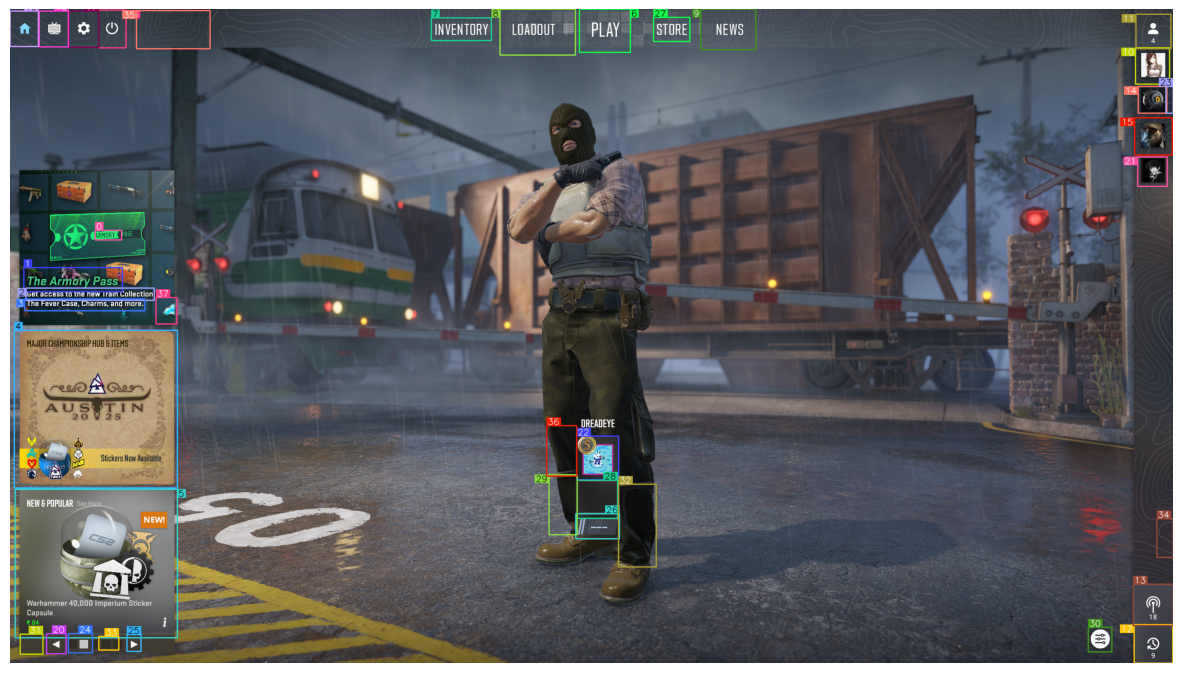

In [3]:
# plot dino_labled_img it is in base64
import base64
import matplotlib.pyplot as plt
import io
plt.figure(figsize=(15,15))

image = Image.open(io.BytesIO(base64.b64decode(dino_labled_img)))
plt.axis('off')

plt.imshow(image)
print(len(parsed_content_list))


In [ ]:
# parsed_content_list

In [ ]:
# import pandas as pd
# df = pd.DataFrame(parsed_content_list)
# df['ID'] = range(len(df))

# df